In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
#X, y = load_wine(return_X_y=True)
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

RANDOM_STATE = 42

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))
print('''Number of labels: {}'''.format(len(set(y))))

pd.DataFrame(X, columns=feature_names).head()

Number of samples: 178
Number of features: 13
Number of labels: 3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Train a classification model to check to evaluate the loss of information

Accuracy for a classifier using the original dataset:  0.9555555555555556


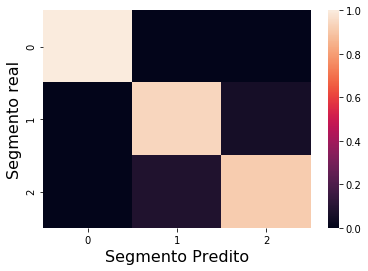

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the original dataset: ', acc)

#feature_importances = dict(zip(feature_names, rfc.feature_importances_))
#[print('''Feature importance of {}: {}'''.format(feat, feature_importances[feat])) for feat in feature_importances]

cm = confusion_matrix(y_pred,y_test,normalize='true')
plt.figure(figsize=(6,4))
ax = sns.heatmap(cm)
ax.set_xlabel("Segmento Predito",fontdict={"fontsize":16})
ax.set_ylabel("Segmento real",fontdict={"fontsize":16})
sns.set(font_scale = 1.5)

# General inputs of dimensionality reduction models

In [4]:
n_components = 2
n_components_PCA_TSNE = 6

# Dimensionality reduction using t-SNE and PCA

### Dimensionality reduction using t-SNE and PCA without data scaling

t-SNE:
Sum of the Kullback-Leiber divergences for 2 principal components: 0.9222598224878311
Accuracy for a classifier using the reduced dataset:  0.8


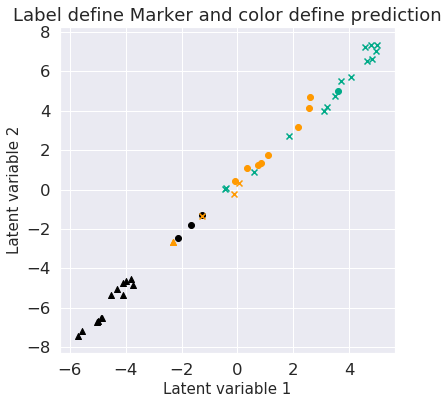

In [5]:
# ===========================================================================================
# Applying dimensionality reduction in the raw data using # t-SNE
# Notes:
# 1. t-SNE has no method transform. So, I'm applying the dimensionality reduction before 
#    split the data into train and test. This only makes sense when you will not apply the 
#    modeling for new data.
# 2. PCA has the method transform. However, to keep consistency in the comparative analisys 
#    with t-SNES, I'm following the same approach of applying the dimensionality reduction 
#    before split the data into train and test. This only makes sense when you will not apply 
#    the modeling for new data.
# ===========================================================================================

# t-SNE

print('t-SNE:')

tsne = TSNE(n_components=n_components,perplexity=50,learning_rate=100,n_iter=1000,metric="euclidean", random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X)

print('''Sum of the Kullback-Leiber divergences for {} principal components: {}'''
      .format(X_tsne.shape[1], 1-tsne.kl_divergence_))

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

PCA:
Cumulative explained variation for 2 principal components: 0.9998271461166032
Accuracy for a classifier using the reduced dataset:  0.7333333333333333


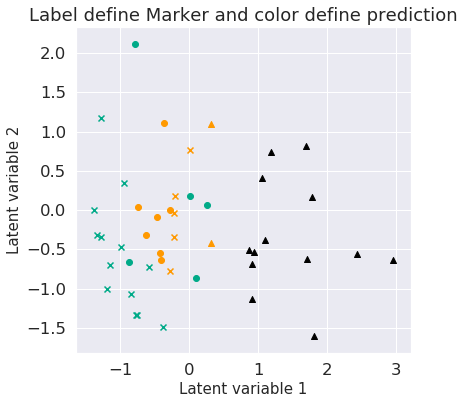

In [6]:
# ===========================================================================================
# Applying dimensionality reduction in the raw data using # t-SNE
# Notes:
# 1. t-SNE has no method transform. So, I'm applying the dimensionality reduction before 
#    split the data into train and test. This only makes sense when you will not apply the 
#    modeling for new data.
# 2. PCA has the method transform. However, to keep consistency in the comparative analisys 
#    with t-SNES, I'm following the same approach of applying the dimensionality reduction 
#    before split the data into train and test. This only makes sense when you will not apply 
#    the modeling for new data.
# ===========================================================================================

# PCA

print('PCA:')

pca = PCA(n_components=n_components, whiten=True, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

print('''Cumulative explained variation for {} principal components: {}'''
      .format(X_pca.shape[1], np.sum(pca.explained_variance_ratio_)))

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

### Dimensionality reduction using t-SNE and PCA with data scaling

t-SNE:
Accuracy for a classifier using the reduced dataset:  0.9555555555555556


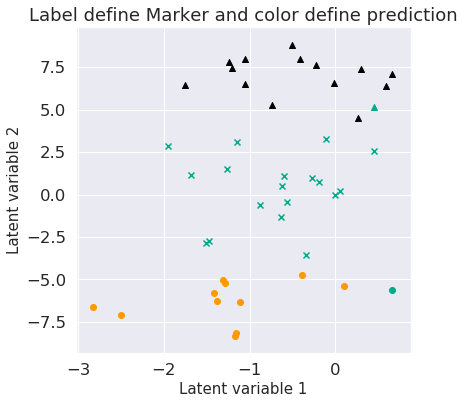

In [7]:
# ===========================================================================================
# Scaling features before of dimensionality reduction
# Approach suggested in Scikit-learning page: Importance of Feature Scaling
# Link: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#importance-of-feature-scaling
# ===========================================================================================

# Feature scaling

X_scaled = StandardScaler().fit_transform(X)

# t-SNE

print('t-SNE:')

tsne = TSNE(n_components=n_components,perplexity=50,learning_rate=100,n_iter=1000,metric="euclidean", random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

PCA:
Accuracy for a classifier using the reduced dataset:  0.9555555555555556


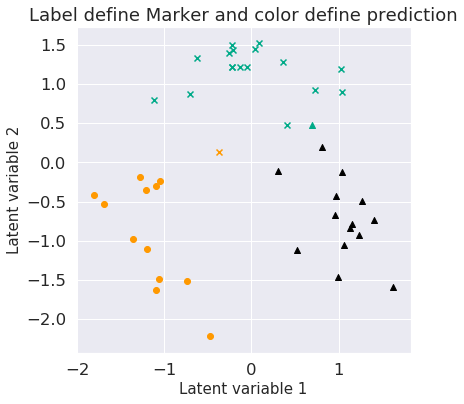

In [8]:
# ===========================================================================================
# Scaling features before of dimensionality reduction
# Approach suggested in Scikit-learning page: Importance of Feature Scaling
# Link: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#importance-of-feature-scaling
# ===========================================================================================

# Feature scaling

X_scaled = StandardScaler().fit_transform(X)

# PCA

print('PCA:')

pca = PCA(n_components=n_components, whiten=True, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

PCA - t-SNE:
Accuracy for a classifier using the reduced dataset:  1.0


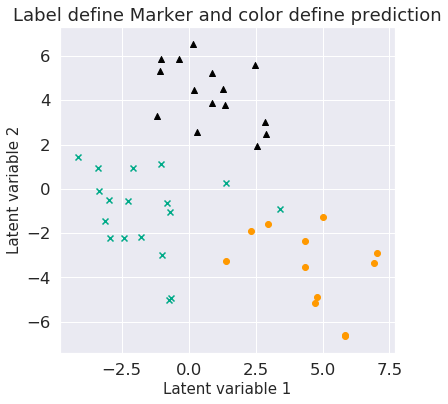

In [9]:
# ===========================================================================================
# Scaling features before of dimensionality reduction + Reducing the number of dimensions 
# before feeding the data into the t-SNE algorithm. Let's use PCA to this first reduction.
# Approach suggested in Scikit-learn page: sklearn.manifold.TSNE
#      It is highly recommended to use another dimensionality reduction method (e.g. PCA 
#      for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions 
#      to a reasonable amount (e.g. 50) if the number of features is very high. This will 
#      suppress some noise and speed up the computation of pairwise distances between samples.
# Link: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold
# ===========================================================================================

# Feature scaling

X_scaled = StandardScaler().fit_transform(X)

print('PCA + t-SNE:')

n_components_PCA_TSNE = 7

pca = PCA(n_components=n_components_PCA_TSNE, whiten=True, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=n_components,perplexity=50,learning_rate=100,n_iter=1000,metric="euclidean", random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

### Dimensionality reduction using a complete pipeline
Pipeline with SS, PCA and RFC, training with train data and fitting with test data

Accuracy using a pipeline for scaling, dimensionality reduction and classfication:  0.9777777777777777


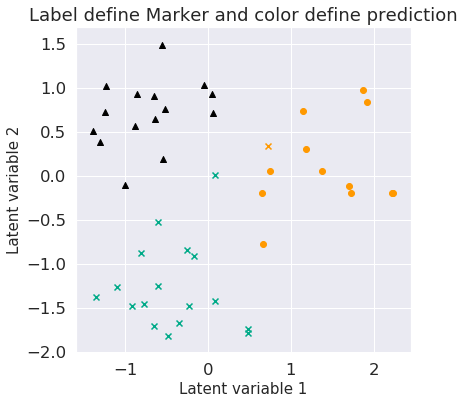

In [12]:
# ===========================================================================================
# Solving the problem of using the whole dataset to scale and reduce dimension.
# Additionally, it is used pipeline to make clear the entire process for:
#   - Scaling
#   - Dimensionality reduction 
#   - Classfication
# Remark: It is not possible to use t-SNE because it does not have transform method
# ===========================================================================================

# Data spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.25, random_state=RANDOM_STATE)

# Make the pipeline for scaling, dimensionality reduction and classfication

sc = StandardScaler()

pca = PCA(n_components=n_components, whiten=True, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)

pl = make_pipeline(sc, pca, rfc)

# Fit to data and predict using the pipeline

pl.fit(X_train, y_train)
y_pred = pl.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy using a pipeline for scaling, dimensionality reduction and classfication: ', acc)

# Plot results

X_test_pl = pl[:2].transform(X_test) # Apply sc and pca to X_test

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test_pl[i,0], X_test_pl[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

# Dimensionality Reduction using Auto-Encoder

In [ ]:
%%sh
pip install tensorflow

In [11]:
def get_autoencoder_model():
    """Creates a simple convolutional neuron network model
    
    Returns:
        [tf.keras.Model] -- Keras Model
    """ 
    input_layer = tf.keras.layers.Input(name="input_tensor", shape=(293))
    model = tf.keras.layers.GaussianNoise(train_set_std)(input_layer)
    # model = input_layer
    
    for dense_units_i, dense_units in enumerate([128,64,32,16,32,64,128]):
    # for dense_units_i, dense_units in enumerate([128,32,128]):
        # if dense_units_i == 0:
        #   model = tf.keras.layers.Dense(
        #       dense_units,
        #       activation=None,
        #       # kernel_regularizer=tf.keras.regularizers.l2(
        #       #     l=5e-4),
        #       # bias_regularizer=tf.keras.regularizers.l2(
        #       #     l=5e-4),
        #       name="model_dense_{}".format(dense_units_i))(input_layer)
        # else:
        #   model = tf.keras.layers.Dense(
        #     dense_units,
        #     activation=None,
        #     # kernel_regularizer=tf.keras.regularizers.l2(
        #     #     l=5e-4),
        #     # bias_regularizer=tf.keras.regularizers.l2(
        #     #     l=5e-4),
        #     name="model_dense_{}".format(dense_units_i))(model)

        model = tf.keras.layers.Dense(
          dense_units,
          activation=None,
          kernel_regularizer=tf.keras.regularizers.l2(
              l=5e-5),
          bias_regularizer=tf.keras.regularizers.l2(
              l=5e-5),
          name="model_dense_{}".format(dense_units_i))(model) 
        
        # model = tf.keras.layers.BatchNormalization(
        #     name="model_batch_norm_{}".format(dense_units_i))(model)
        model = tf.keras.layers.Activation(
            activation="relu", name="model_relu_{}".format(dense_units_i))(model)
    model = tf.keras.layers.Dropout(rate=0.3, name="model_dropout")(model)
    
    model = tf.keras.layers.Dense(
            293,
            activation=None,
            # activation='sigmoid',
            # kernel_regularizer=tf.keras.regularizers.l2(
            #     l=5e-3),
            # bias_regularizer=tf.keras.regularizers.l2(
            #     l=5e-3),
            name="model_dense_last")(model)     

    model = tf.keras.Model(inputs=input_layer, outputs=model)

    return model